In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [2]:
data=np.random.exponential(scale=2,size=1000)
df=pd.DataFrame({"Salary":data})

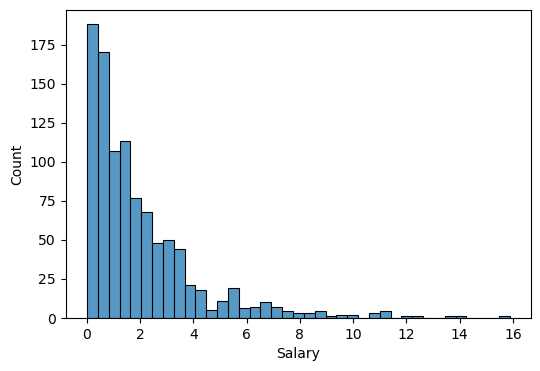

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [6]:
df.Salary.skew()

2.309074229673673

In [7]:
df["updated_Salary"],lambda_val=boxcox(df.Salary)

In [8]:
df.head()

,Salary,updated_Salary
0,4.035016,1.632391
1,1.184461,0.172475
2,1.647551,0.527702
3,3.299826,1.365068
4,2.408512,0.969618


In [9]:
lambda_val

0.21968798718115043

In [12]:
df.updated_Salary.skew()

-0.02900244993853066

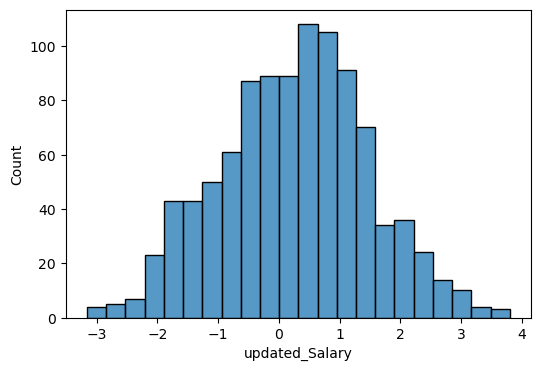

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [14]:
data=np.random.exponential(scale=2,size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})

In [15]:
df.head()

,Salary2
0,2.821025
1,9.700913
2,9.967040
3,7.439173
4,8.437024


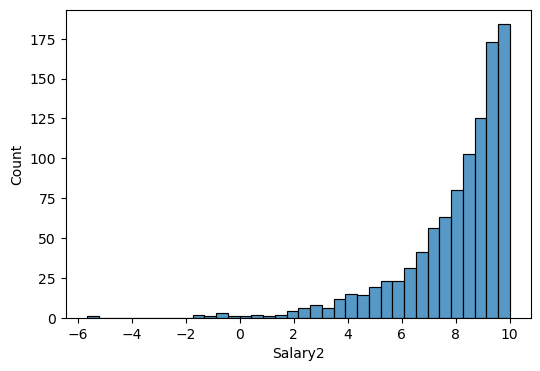

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [18]:
df.Salary2.skew()

-1.921847924703639

In [23]:
df["reflex_salary"]=(df.Salary2.max()-df.Salary2)+1

In [24]:
df.head()

,Salary2,reflex_salary,transformed_salary
0,2.821025,8.178285,2.971061
1,9.700913,1.298397,-0.209332
2,9.967040,1.032270,-2.433621
3,7.439173,3.560136,1.940061
4,8.437024,2.562285,1.446150


In [26]:
df["transformed_salary"]=np.log(df.reflex_salary)

In [27]:
df.transformed_salary.skew()

0.44984407451955827

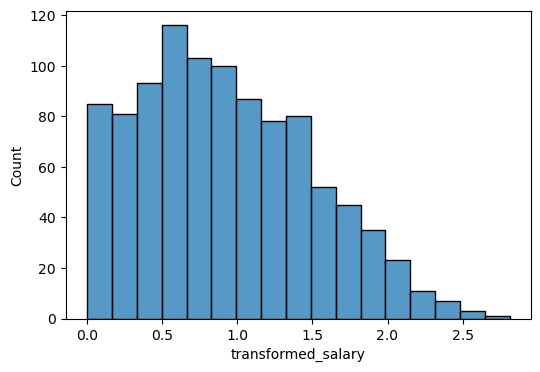

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_salary)
plt.show()

In [35]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data=pd.read_csv(r"C:\Users\Aiman\Downloads\test2.csv")

In [36]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN


In [37]:
data.shape

(6, 5)

In [38]:
data.Age=data.Age.fillna(value=data.Age.mean())
data.Salary=data.Salary.fillna(value=data.Salary.mean())

In [33]:
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [39]:
encoder=LabelEncoder()

In [40]:
data["transformed_name"]=encoder.fit_transform(data.Name)

In [41]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [42]:
data[["Department"]].shape

(6, 1)

In [43]:
encoder2=OneHotEncoder(sparse_output=False)

In [45]:
encoded=encoder2.fit_transform(data[["Department"]])

In [47]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [48]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [53]:
scaler=StandardScaler()

In [54]:
data["scaled_salary"]=scaler.fit_transform(data[["Salary"]])

In [55]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
scaler2=MinMaxScaler()


In [63]:
data["MinMax_salary"]=scaler2.fit_transform(data[["Salary"]])

In [64]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary,MinMax_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755,0.00
1,1,Bob,30.0,IT,60000.0,1,0.229668,0.50
2,2,Charlie,35.0,Finance,70000.0,2,1.665091,1.00
3,3,David,28.8,IT,62000.0,3,0.516752,0.60
4,4,Eve,29.0,HR,58400.0,4,0.000000,0.42


In [65]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary,MinMax_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755,0.00
1,1,Bob,30.0,IT,60000.0,1,0.229668,0.50
2,2,Charlie,35.0,Finance,70000.0,2,1.665091,1.00
3,3,David,28.8,IT,62000.0,3,0.516752,0.60
4,4,Eve,29.0,HR,58400.0,4,0.000000,0.42


In [70]:
min(data.MinMax_salary),max(data.MinMax_salary)

(0.0, 1.0)